# Machine Learning Master Notes 5 - Linear Regression (One Feature with Intercept)

## Linear Regression (One Feature with Intercept)

Now, we can improve our understanding by adding `b` (y-intercept) back into our equation.

### Prepare Environment

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

## Linear Regression (One Feature) and Cost Function


In summary, for one feature linear regression:

Hypothesis: $$f_{w,b}(x)=wx+b$$

Parameters:	$$w ,b$$

Cost Function:	$$J(w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})^{2}$$ 


similarly $$J(w, b) = \sum\limits_{i=0}^{m-1} ((wx^{(i)} + b)-y^{(i)})^{2}$$

Goal: minimize $J(w, b)$


## Linear Regression (One Feature) Best Fit Line (Another 3 Points Example with Intercept)

First, let's use another 3 data points example:

In [2]:
x = np.array([1,2,3])
y = np.array([3,4,5])

The actual formula will be:
$$y = wx + b$$
$$y = 1x + 2$$

Thus
$$w = 1, b = 2$$

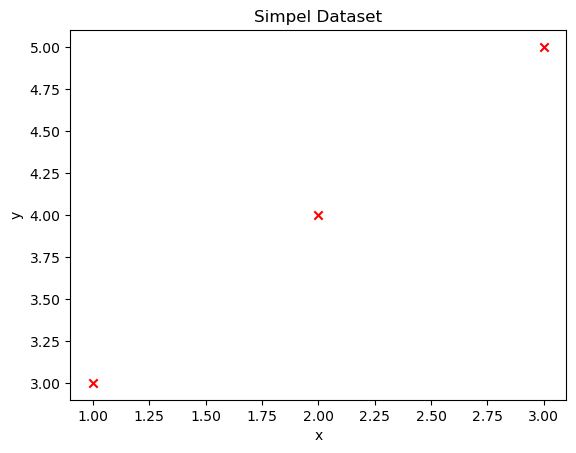

In [3]:
fig = plt.figure()
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Simpel Dataset")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.show()

In [4]:
def compute_prediction_line(x,w,b):
    m = len(x)
    f = np.zeros(m)
    for i in range(m):
        f[i] = (x[i] * w) + b 
        
    return f


b is 0
w is 0


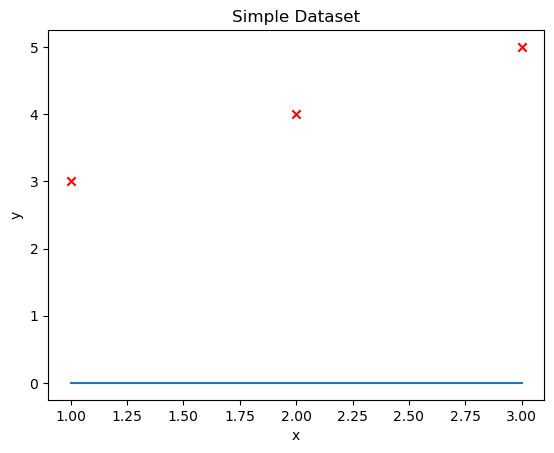

b is 0
w is 1


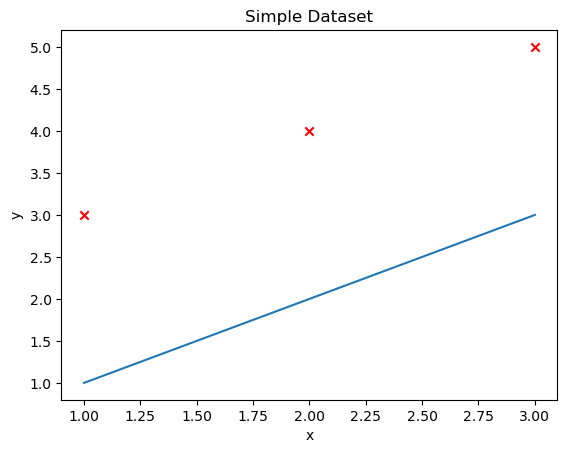

b is 0
w is 2


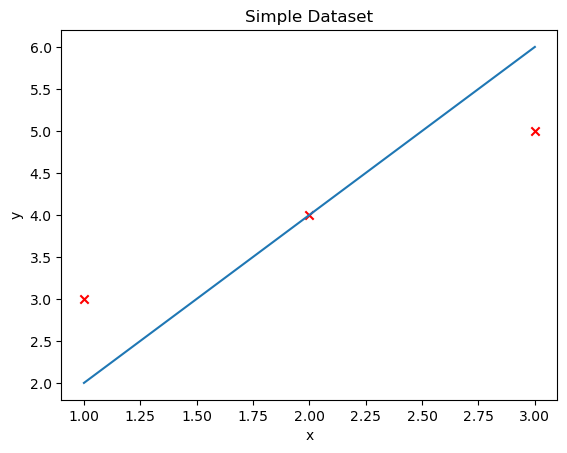

b is 0
w is 3


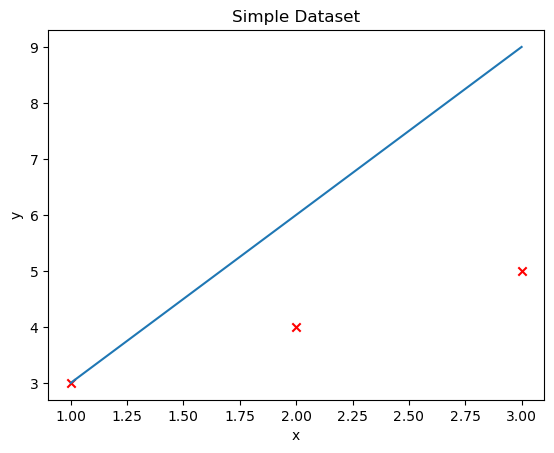

b is 0
w is 4


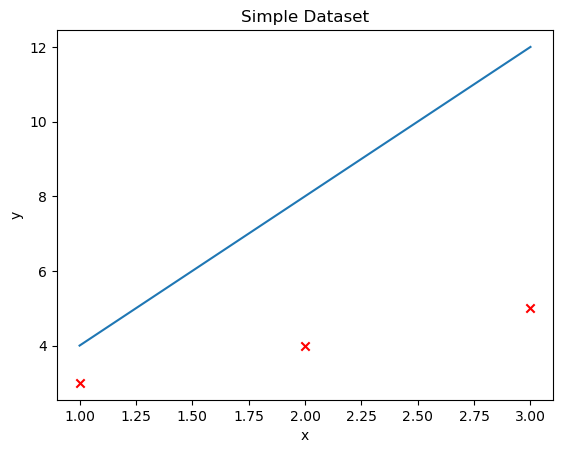

b is 1
w is 0


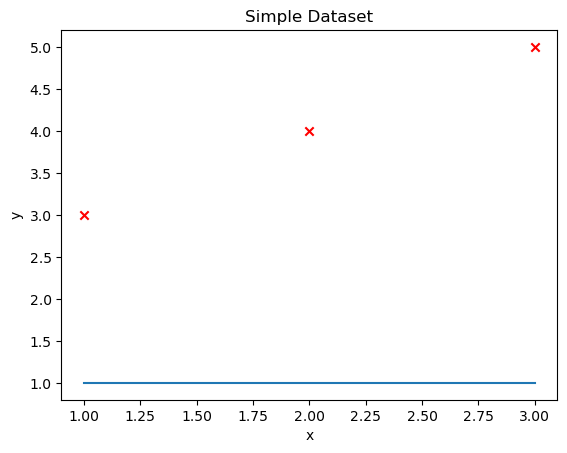

b is 1
w is 1


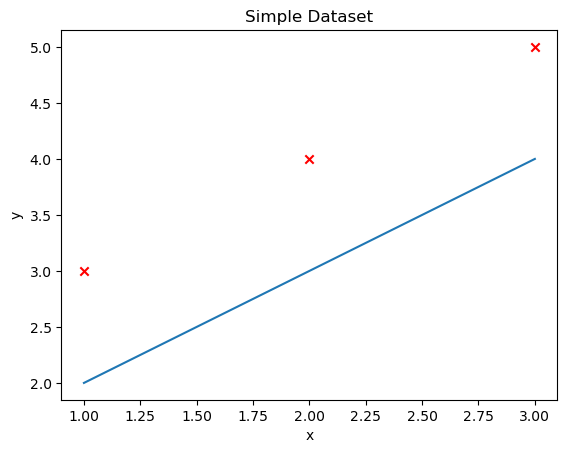

b is 1
w is 2


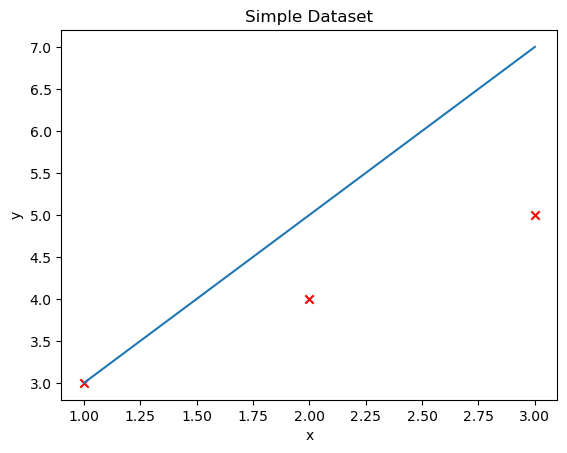

b is 1
w is 3


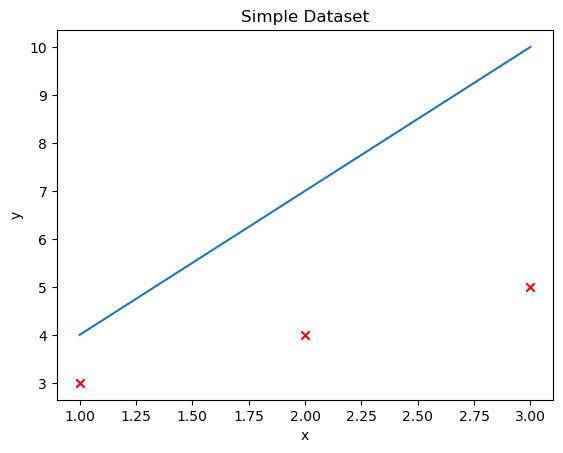

b is 1
w is 4


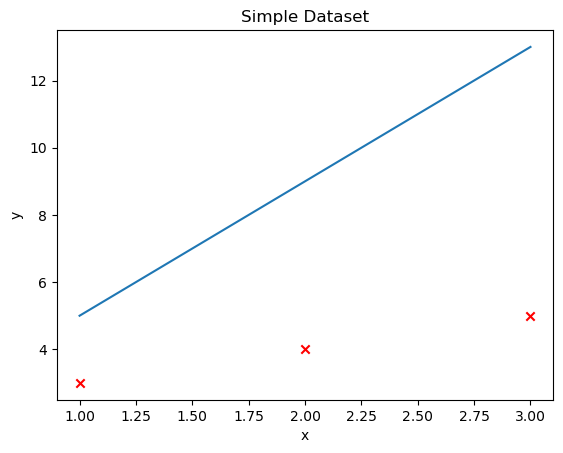

b is 2
w is 0


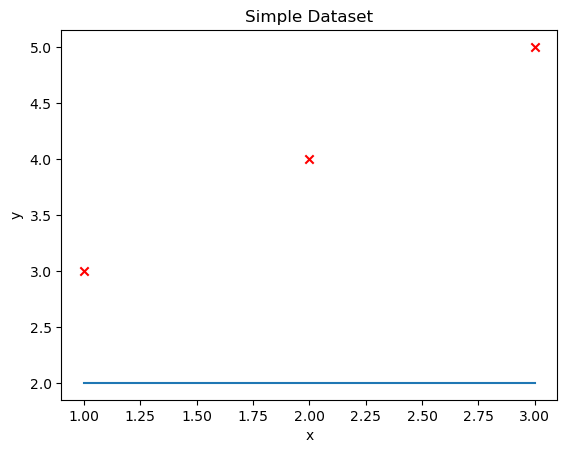

b is 2
w is 1


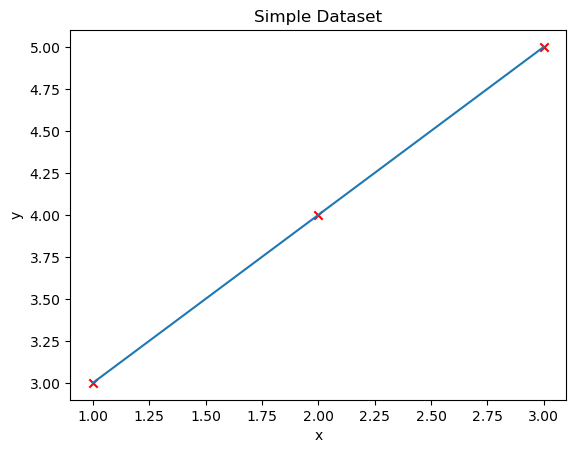

b is 2
w is 2


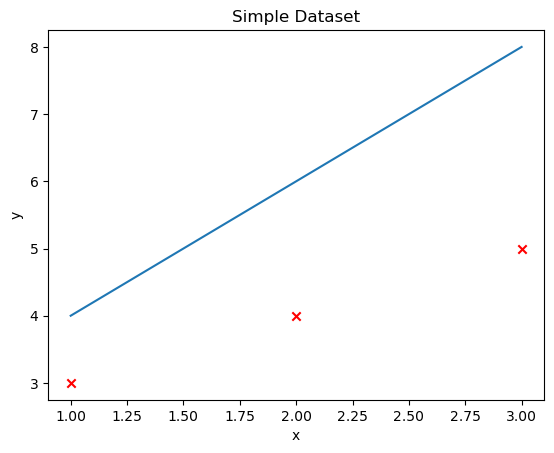

b is 2
w is 3


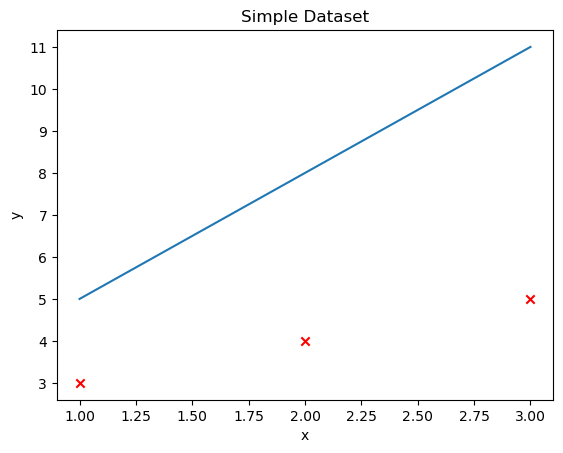

b is 2
w is 4


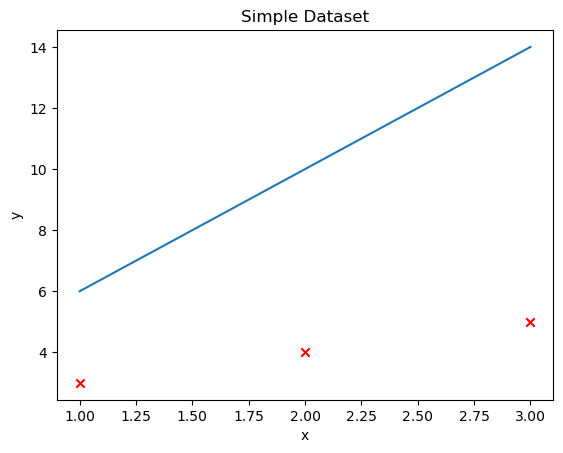

b is 3
w is 0


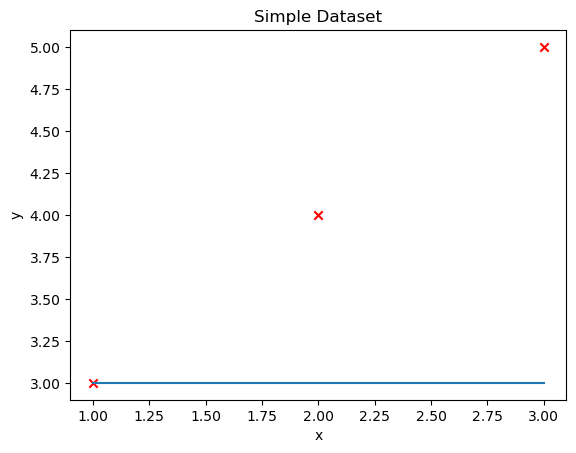

b is 3
w is 1


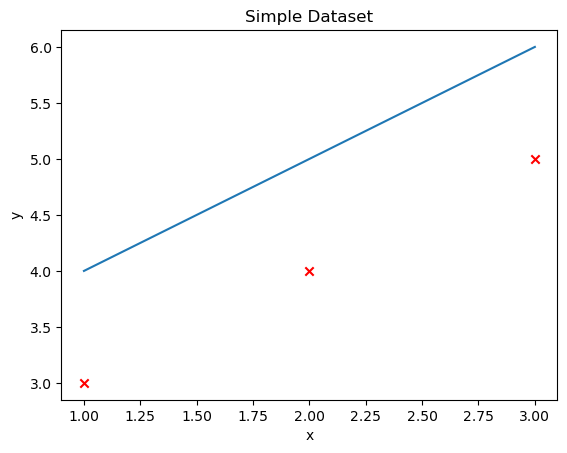

b is 3
w is 2


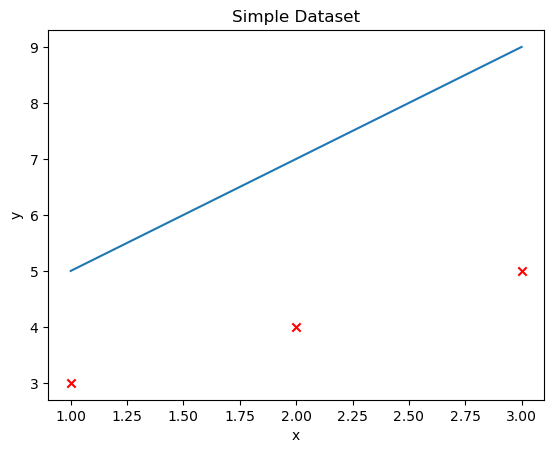

b is 3
w is 3


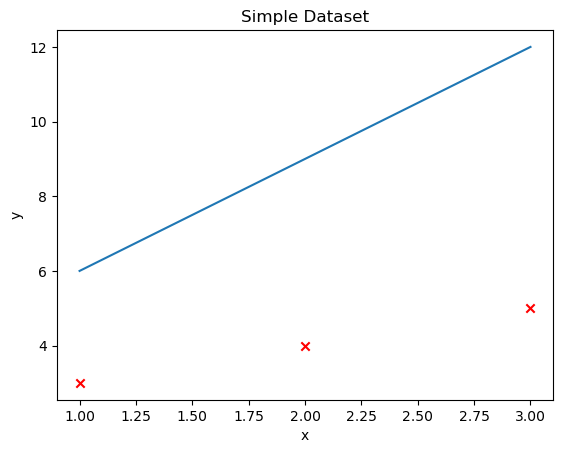

b is 3
w is 4


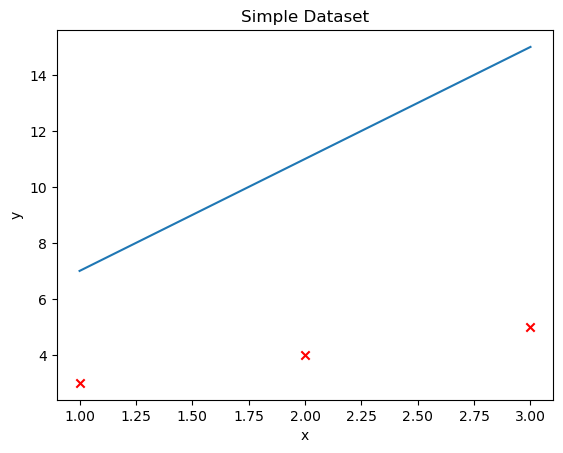

b is 4
w is 0


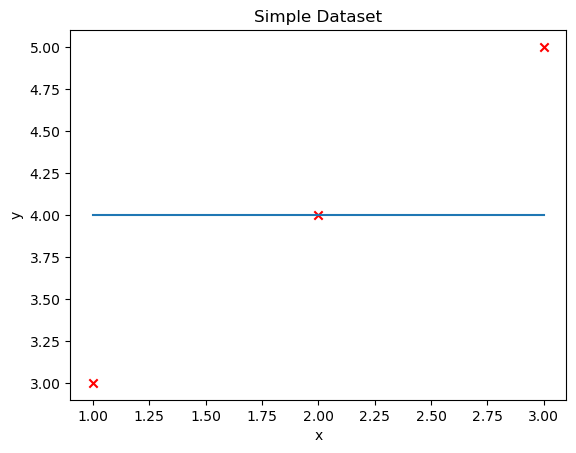

b is 4
w is 1


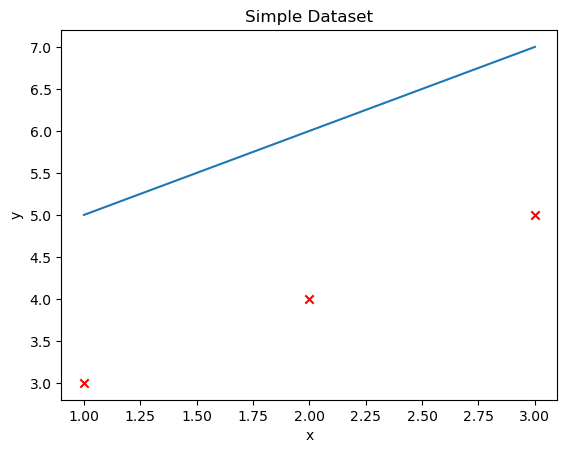

b is 4
w is 2


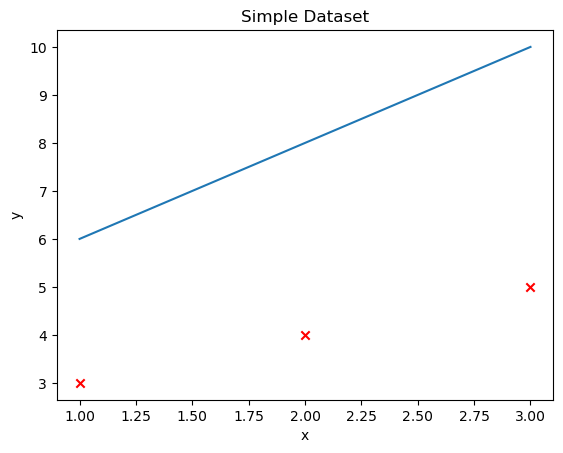

b is 4
w is 3


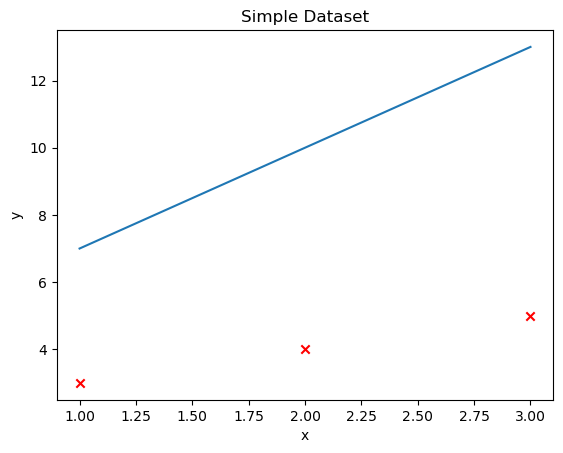

b is 4
w is 4


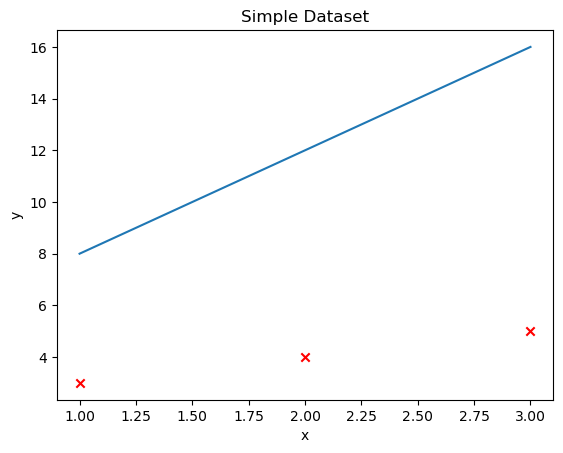

In [5]:
# Plot the data points
for b in range(0,5):    
    for w in range(0,5): 
        print(f'b is {b}')
        print(f'w is {w}')
        line = compute_prediction_line(x,w,b)
        fig = plt.figure()
        plt.scatter(x, y, marker='x', c='r',label='Actual Values')
        plt.plot(x, line, label=str('Our Prediction b ='+str(b)+ ' w = ' + str(w)))
        # Set the title
        plt.title("Simple Dataset")
        # Set the y-axis label
        plt.ylabel('y')
        # Set the x-axis label
        plt.xlabel('x')
        #plt.legend()
        plt.show()


From the graph above we can see that **b = 2 and w = 1** fits the line. You can also see that complexity increases when we add the y-intercept into the equation. 

We have to plot 25 prediction lines into a graph.

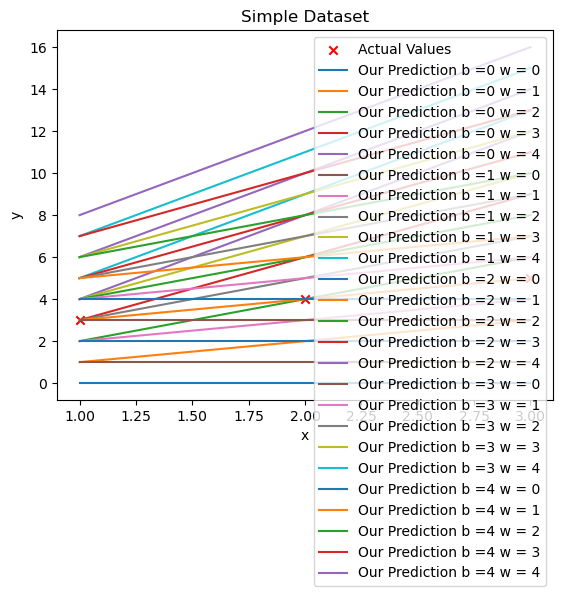

In [6]:
plt.scatter(x, y, marker='x', c='r',label='Actual Values')
for b in range(0,5):    
    for w in range(0,5): 
        #print(f'b is {b}')
        #print(f'w is {w}')
        line = compute_prediction_line(x,w,b)        
        plt.plot(x, line, label=str('Our Prediction b ='+str(b)+ ' w = ' + str(w)))
# Set the title
plt.title("Simple Dataset")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.legend()
plt.show()

**The graphs also becomes complicated when we add y-intercept. New lets compute the cost function directly.**

## Computing Cost Function with Intercept (Another 3 Points Example with Intercept)

In [7]:
def cost_function(x,y,b,w):
    m = x.shape[0]
    sumAll = 0
    for i in range(m):
        fx = (((w * x[i]) + b) - y[i]) ** 2
        sumAll += fx

    return (1 / (2 * m)) * sumAll


In [8]:
x = np.array([1,2,3])
y = np.array([3,4,5])

for b in range(0,10):
    for w in range(0,10):
        cost = cost_function(x,y,b,w)
        print(f"If b = {b} and w = {w}, then the cost is :{cost}.")  

If b = 0 and w = 0, then the cost is :8.333333333333332.
If b = 0 and w = 1, then the cost is :2.0.
If b = 0 and w = 2, then the cost is :0.3333333333333333.
If b = 0 and w = 3, then the cost is :3.333333333333333.
If b = 0 and w = 4, then the cost is :11.0.
If b = 0 and w = 5, then the cost is :23.333333333333332.
If b = 0 and w = 6, then the cost is :40.33333333333333.
If b = 0 and w = 7, then the cost is :62.0.
If b = 0 and w = 8, then the cost is :88.33333333333333.
If b = 0 and w = 9, then the cost is :119.33333333333333.
If b = 1 and w = 0, then the cost is :4.833333333333333.
If b = 1 and w = 1, then the cost is :0.5.
If b = 1 and w = 2, then the cost is :0.8333333333333333.
If b = 1 and w = 3, then the cost is :5.833333333333333.
If b = 1 and w = 4, then the cost is :15.5.
If b = 1 and w = 5, then the cost is :29.833333333333332.
If b = 1 and w = 6, then the cost is :48.83333333333333.
If b = 1 and w = 7, then the cost is :72.5.
If b = 1 and w = 8, then the cost is :100.8333333

We can modified the code above to find the lowest cost.

In [9]:
x = np.array([1,2,3])
y = np.array([3,4,5])

lowest = None
lowest_b = 0
lowest_w = 0
for b in range(0,10):
    for w in range(0,10):
        cost = cost_function(x,y,b,w)
        if lowest is None:
            lowest = cost
            lowest_b = b
            lowest_w = w
        elif lowest > cost:
            lowest = cost
            lowest_b = b
            lowest_w = w
        #print(f"If b = {b} and w = {w}, then the cost is :{cost}.")    

print(f"The lowest cost is {lowest}==> b is {lowest_b} and w is {lowest_w}")

The lowest cost is 0.0==> b is 2 and w is 1


As you can see, for linear equations, we can program a code to find the lowest cost. However,things get complicated if we introduce more variables (more $x$). Furthermore our range to test $b$ and $w$ is very narrow. In real life application, we would not know where $b$ and $w$ lies. Thus we may need to test more combinations. If we are computing $b$ and $w$ of 1000 possible value, the combination would be 1000 * 1000 computations. Thus, we need a different algorithm that can work with multiple conditions effectively.

## Relationship Between Cost Function with Intercept and Weight

### Cost Function with Intercept, Weight is 1 (Generic Example)

In summary, for one feature linear regression:

Hypothesis: $$f_{w,b}(x)=wx+b$$

Parameters:	$$w ,b$$

Cost Function:	$$J(w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})^{2}$$ 


similarly $$J(w, b) = \sum\limits_{i=0}^{m-1} ((wx^{(i)} + b)-y^{(i)})^{2}$$

Goal: minimize $J(w, b)$


How should a cost function with b and w looks like. 
First, let us assume $𝑤=1$, then we proceed to compute the cost function.

In [10]:
def cost_function_simple_b(x,y,b):
    m = x.shape[0]
    w = 1
    sumAll = 0
    for i in range(m):
        fx = (((w * x[i]) + b) - y[i]) ** 2
        sumAll += fx
    return (1 / (2 * m)) * sumAll

In [11]:
x = np.arange(1,10)
y = np.arange(1,10)
b = np.arange(-4,4,0.1)
costb = cost_function_simple_b(x,y,b)
costb

array([8.00000000e+00, 7.60500000e+00, 7.22000000e+00, 6.84500000e+00,
       6.48000000e+00, 6.12500000e+00, 5.78000000e+00, 5.44500000e+00,
       5.12000000e+00, 4.80500000e+00, 4.50000000e+00, 4.20500000e+00,
       3.92000000e+00, 3.64500000e+00, 3.38000000e+00, 3.12500000e+00,
       2.88000000e+00, 2.64500000e+00, 2.42000000e+00, 2.20500000e+00,
       2.00000000e+00, 1.80500000e+00, 1.62000000e+00, 1.44500000e+00,
       1.28000000e+00, 1.12500000e+00, 9.80000000e-01, 8.45000000e-01,
       7.20000000e-01, 6.05000000e-01, 5.00000000e-01, 4.05000000e-01,
       3.20000000e-01, 2.45000000e-01, 1.80000000e-01, 1.25000000e-01,
       8.00000000e-02, 4.50000000e-02, 2.00000000e-02, 5.00000000e-03,
       6.31088724e-30, 5.00000000e-03, 2.00000000e-02, 4.50000000e-02,
       8.00000000e-02, 1.25000000e-01, 1.80000000e-01, 2.45000000e-01,
       3.20000000e-01, 4.05000000e-01, 5.00000000e-01, 6.05000000e-01,
       7.20000000e-01, 8.45000000e-01, 9.80000000e-01, 1.12500000e+00,
      

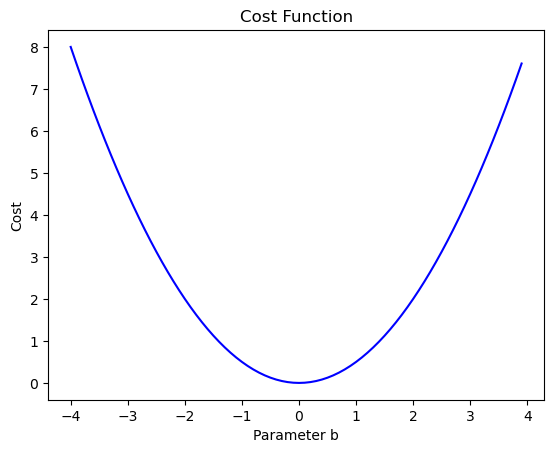

In [12]:
fig1 = plt.figure()
plt.plot(b, costb, color='b')
plt.title("Cost Function")
plt.xlabel("Parameter b")
plt.ylabel("Cost")
plt.show()

Similarly, the cost function of b is also a U shaped curved. 

### One Parameter Linear Regression and Cost Function Summary

In summary, for one feature linear regression:

Hypothesis: $$f_{w,b}(x)=wx+b$$

Parameters:	$$w ,b$$

Cost Function:	$$J(w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})^{2}$$ 


similarly $$J(w, b) = \sum\limits_{i=0}^{m-1} ((wx^{(i)} + b)-y^{(i)})^{2}$$

Goal: minimize $J(w, b)$


If we combined b and w, the 3D plot will be shown in the next part.

### Cost Function with Weights/Intercept 3D Plot (Generic Example)

In [13]:
def cost_function_i(x,y,b,w):
    m = x.shape[0]
    sumAll = 0
    for i in range(m):
        fx = (((w * x[i]) + b) - y[i]) ** 2
        sumAll += fx
    return (1 / (2 * m)) * sumAll
    

The following is cost function using matrix computation.

In [14]:
x = np.arange(1,10)
y = np.arange(1,10)
b = np.linspace(-4,4,200)
w = np.linspace(-4,4,200)

In [15]:
%matplotlib widget

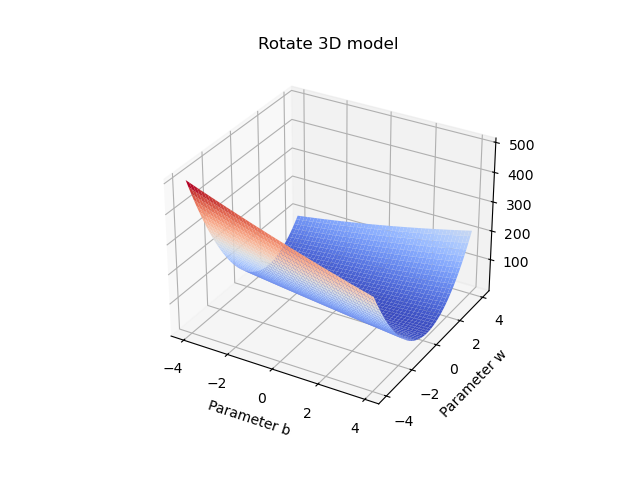

In [16]:
plt.close('all') 
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection = '3d')


# Data
b, w = np.meshgrid(b, w)
cost =  cost_function_i(x,y,b,w)

#print(b, w, cost)
# print(b.shape)
# print(w.shape)
# print(cost.shape)
# print(cost_function_b(x,b,w))

# Plot the 3d surface
ax2.plot_surface(b, w, cost, cmap=cm.coolwarm)
ax2.set_title("Rotate 3D model")
ax2.set_xlabel("Parameter b")
ax2.set_ylabel("Parameter w");


### Cost Function with Weights/Intercept Contour Plot (Generic Example)

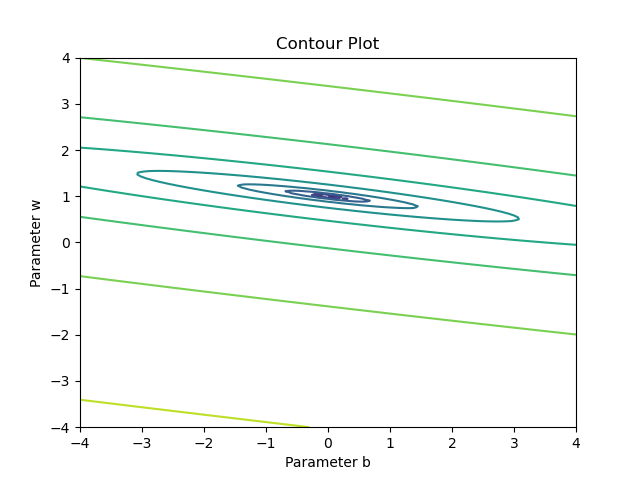

In [17]:
x = np.arange(1,10)
y = np.arange(1,10)
b_space  = np.linspace(-4,4, 200)
w_space  = np.linspace(-4,4, 200)


# print(w_space)
# print(b_space)

plt.close('all') 
fig3 = plt.figure()
ax3 = fig3.add_subplot()

# Data
tmp_b,tmp_w = np.meshgrid(b_space,w_space)
cost =  cost_function_i(x,y,tmp_b,tmp_w)

# print(b_range.shape)
# print(w_range.shape)
# print(cost.shape)

# Plot the 3d surface
ax3.contour(tmp_b, tmp_w, np.log(cost), levels=8)
ax3.set_title("Contour Plot")
ax3.set_xlabel("Parameter b")
ax3.set_ylabel("Parameter w");

### Cost Function with Weights/Intercept 3D Plot (Bowl Shape Example)

Theoretically, b and w cost function can create a bowl shape cost fuction below. A more common cost function would be similar to the 3D graph above. 

The following is the theoretical presentation of the bowl shape plot.

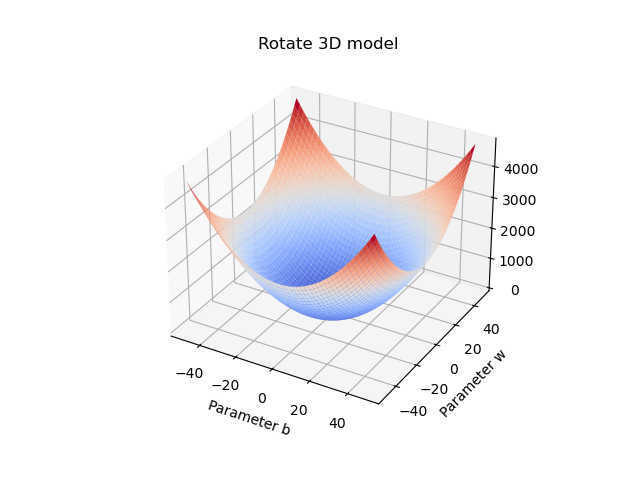

In [18]:
plt.close('all') 
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')

# Data
b = np.arange(-49,50)
w = np.arange(-49,50)
b, w = np.meshgrid(b, w)
cost = b**2 + w**2
# print(b.shape)
# print(w.shape)
# print(cost.shape)

# Plot the 3d surface
ax3.plot_surface(b, w, cost, cmap=cm.coolwarm);
ax3.set_title("Rotate 3D model")
ax3.set_xlabel("Parameter b")
ax3.set_ylabel("Parameter w");

### Cost Function with Weights/Intercept Contour Plot (Bowl Shape Example)

For better visuallyzation, we can also create a contour plot as shown below:

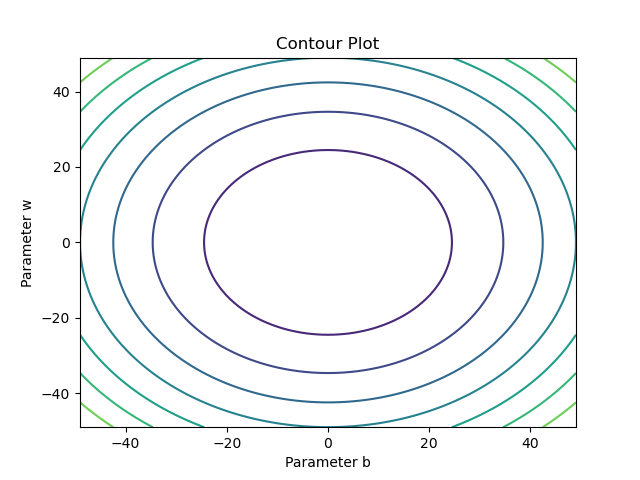

In [19]:
plt.close('all') 
fig4 = plt.figure()
ax4 = fig4.add_subplot()

# Data
b = np.arange(-49,50)
w = np.arange(-49,50)
b, w = np.meshgrid(b, w)
cost = b**2 + w**2
# print(b.shape)
# print(w.shape)
# print(cost.shape)

# Plot the 3d surface
ax4.contour(b, w, cost,levels=8);
ax4.set_title("Contour Plot")
ax4.set_xlabel("Parameter b")
ax4.set_ylabel("Parameter w");

Base on the graph above, to achive minimal cost, we should find the b and w where the cost is at the bottom of the bowl shape curve or at the center of the contour plot. 

### Non Linear Plot

Please also note that the bowl shape only applies to linear regression, for non linear regression, there will be more than one optimum.

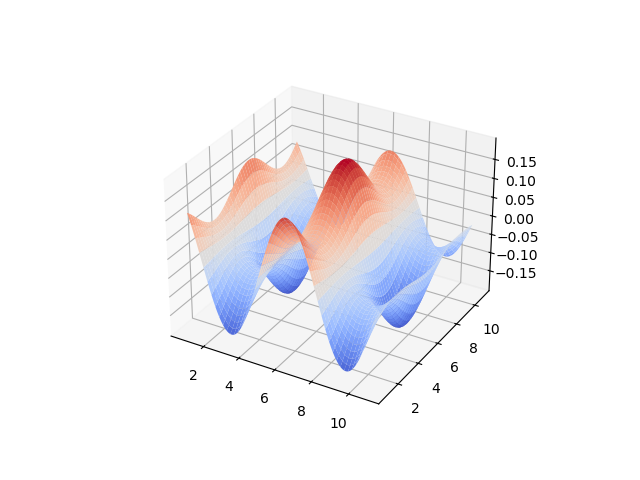

In [26]:
# The following is just an example to illustrates the complexity of non linear regression.
plt.close('all')
fig5 = plt.figure()
ax5 = fig5.add_subplot(projection='3d')

# Data
b = np.linspace(0,10,100)+np.random.rand()
w = np.linspace(0,16,100)
b, w = np.meshgrid(b, b)
cost =  np.random.rand()* np.cos(b) * (np.cos(w) + 2) 
#print(b.shape)
#print(w.shape)
#print(cost.shape)

# Plot the 3d surface
surface = ax5.plot_surface(b, w, cost, cmap=cm.coolwarm)


**Other Non Linear Graph on the Web**

https://miro.medium.com/v2/resize:fit:1400/format:webp/1*X0i22rzOnOLJPfMdkpQlXQ.png

## End of Note 5